### Pivot & Unstack Review and Final Homework (200 Points)

Your task in this homework is filling the cells where "your code here" sign appears. Its a cumulative work flow, I provided some code as well so just follow the stream until the last question which is 70 points and use your assumtions and insight for that.

Good luck!

### Unstack

DataFrame.unstack(level=-1, fill_value=None)

Pivot a level of the (necessarily hierarchical) index labels, returning a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels. If the index is not a MultiIndex, the output will be a Series (the analogue of stack when the columns are not a MultiIndex). The level involved will automatically get sorted.

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),
                                    ('two', 'a'), ('two', 'b')])
s = pd.Series(np.arange(1.0, 5.0), index=index)
s


one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
dtype: float64

In [4]:
b=s.unstack()
b

,a,b
one,1.0,2.0
two,3.0,4.0


In [7]:
c=b.stack()
c

one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
dtype: float64

In [8]:
df = pd.DataFrame({'month': [1, 4, 7, 10],
                    'year': [2012, 2014, 2013, 2014],
                    'sale':[55, 40, 84, 31]})

In [9]:
df.set_index(['month'])
#df.set_index(['year', 'month'])

,year,sale
month,,
1,2012,55
4,2014,40
7,2013,84
10,2014,31


In [33]:
a=df.unstack()
a

month  0       1
       1       4
       2       7
       3      10
year   0    2012
       1    2014
       2    2013
       3    2014
sale   0      55
       1      40
       2      84
       3      31
dtype: int64

### Pivot Tables

pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html

Create a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame

In [16]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                    "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                    "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                          "large"],
                   "D": [1, 2, 1, 3, 1, 4, 5, 6, 7]})

df

,A,B,C,D
0,foo,one,small,1
1,foo,one,large,2
2,foo,one,large,1
3,foo,two,small,3
4,foo,two,small,1
5,bar,one,large,4
6,bar,one,small,5
7,bar,two,small,6
8,bar,two,large,7


In [12]:
table = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    2.0    1.0
    two    NaN    3.0

In [17]:
table = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'], aggfunc=np.mean)
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    1.5    1.0
    two    NaN    2.0

In [18]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                    "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                    "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                          "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                  "E": [11, 21, 21, 33, 33, 44, 55, 66, 77]})



table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],
                   aggfunc={'D': np.mean,
                            'E': [min, max, np.median]})
table

D     E             
               mean   max median   min
A   C                                 
bar large  5.500000  77.0   60.5  44.0
    small  5.500000  66.0   60.5  55.0
foo large  2.000000  21.0   21.0  21.0
    small  2.333333  33.0   33.0  11.0

### Case from Social Security Names Catalog
#### Homework Starts Here

The Social Security data are available on multiple government websites, but I've also included them in the names.zip file in the exercise file directory. 

We need to uncompress that archive. We can do that with the Python zipfile module. So we import that, we create a zipfile object from the names.zip file and we extract its contents into the current directory.

That's just a dot. We'll use Python to look at the contents of the directory names. For that, we load the os module and use the listdir function. Very good, we see many files, presumably one for every year. Let's have a look at one. 

In [3]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline

In [5]:
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

In [6]:
import os
os.listdir('names')

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt',
 'yob1890.txt',
 'yob1891.txt',
 'yob1892.txt',
 'yob1893.txt',
 'yob1894.txt',
 'yob1895.txt',
 'yob1896.txt',
 'yob1897.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1900.txt',
 'yob1901.txt',
 'yob1902.txt',
 'yob1903.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1906.txt',
 'yob1907.txt',
 'yob1908.txt',
 'yob1909.txt',
 'yob1910.txt',
 'yob1911.txt',
 'yob1912.txt',
 'yob1913.txt',
 'yob1914.txt',
 'yob1915.txt',
 'yob1916.txt',
 'yob1917.txt',
 'yob1918.txt',
 'yob1919.txt',
 'yob1920.txt',
 'yob1921.txt',
 'yob1922.txt',
 'yob1923.txt',
 'yob1924.txt',
 'yob1925.txt',
 'yob1926.txt',
 'yob1927.txt',
 'yob1928.txt',
 'yob1929.txt',
 'yob1930.txt',
 'yob1931.txt',
 'yob1932.txt',
 'yob1933.txt',
 'yob1934.txt',
 'yob1935.txt',
 'yob1936.txt',
 'yob1937.txt',
 'yob1938.txt',
 'yob1939.txt',
 'yob1940.txt',
 

In [7]:
open('names/yob2011.txt','r').readlines()[:10]

['Sophia,F,21816\n',
 'Isabella,F,19870\n',
 'Emma,F,18777\n',
 'Olivia,F,17294\n',
 'Ava,F,15480\n',
 'Emily,F,14236\n',
 'Abigail,F,13229\n',
 'Madison,F,12360\n',
 'Mia,F,11512\n',
 'Chloe,F,10970\n']

In [8]:
names2011 = pd.read_csv('names/yob2011.txt')

In [9]:
names2011.head()

,Sophia,F,21816
0,Isabella,F,19870
1,Emma,F,18777
2,Olivia,F,17294
3,Ava,F,15480
4,Emily,F,14236


In [10]:
# Explicitly provide column names to your data and assign it to names2011
# your code is here (5 points)
names2011.columns=['name','sex','number']

In [11]:
names2011.head()

,name,sex,number
0,Isabella,F,19870
1,Emma,F,18777
2,Olivia,F,17294
3,Ava,F,15480
4,Emily,F,14236


In [12]:
#Now we need to load all the tables for the years between 1880 and 2014. 
#While we do so, we will add a column year to each table so that the records 
#for the same name but different years will not be confused. 
#We"ll collect all these tables in a names_all list. 
#Let's then loop over years from 1880 to 2014, 
#so we'll extend the range to 2014+1. 
#We'll append the list, the result of reading a comma-separated file.
allyears=pd.DataFrame()
columns=['name','sex','number']
for filenames in os.listdir('names')[1:]:
    year = filenames[3:7]
    if int(year) >= 1880 & int(year) <= 2014:
        table = pd.read_csv('names/yob'+year+'.txt',names=columns)
        table['year']= int(year)
        allyears=pd.concat([allyears, table])

# 5 Points

In [13]:
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [14]:
allyears.tail()

,name,sex,number,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


We need to rework this data in a way that will let us look at the changing popularity of a given name. We will do this using Panda's MulitIndexes. We will index the data on gender first, then name, then year. So we build a new DataFrame where we set the index using sex first, then name, then year. We will also sort the index.

In [15]:
# your code is here 5 Points
allyears_indexed = allyears.set_index(['sex', 'name','year']).sort_index(ascending=True)

In [16]:
allyears_indexed

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5
...                    ...
M   Zytavious 2009       7
              2010       6
    Zyvion    2009       5
    Zyyon     2014       6
    Zzyzx     2010       5

[1825433 rows x 1 columns]

Remember, We use the special indexing attributes loc and iloc to select rows respectively by the value of the index or by the number of the row. Loc also lets us select any combination of fields for a MultiIndex. iloc also lets but since its a strict position indexer, it does not regard the structure at all, only the first actual behavior (inner/outer level indexing position is confusing). Please create we want a table of Marys across years by using Loc.

In [17]:
#your code is here 10 Points
mary = allyears_indexed.loc['F'].loc['Mary']
mary

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217
...,...
2010,2862
2011,2701
2012,2565


What if we want to plot the popularity of a name? So let's write a function that does just that. This takes the sex and a name, selects the appropriate rows in the DataFrame, and then plots the values of this subset of data against the index, which, in this case, would be just the years. Let's try it out.

In [18]:
def plotname(sex,name):
    yn = allyears_indexed.loc[sex].loc[name]
    yn['number'].plot(kind='line')
    pp.xlim(1870, 2020)

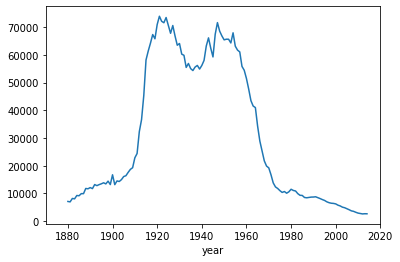

In [19]:
plotname('F','Mary')

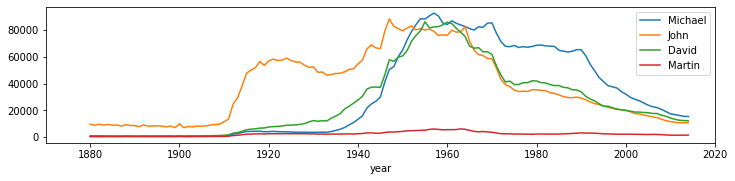

In [20]:
pp.figure(figsize=(12,2.5))

# 10 Points
# now plot the popularity of Michael, John, David, Martin altogether in a plot
names = ['Michael','John','David','Martin']
for name in names:
    plotname('M',name)
    
pp.legend(names)

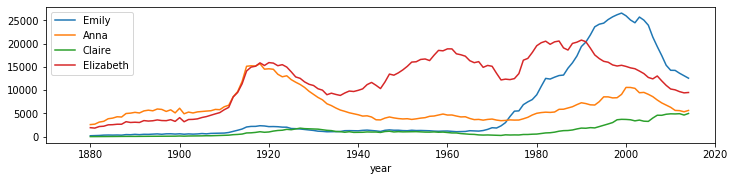

In [21]:
pp.figure(figsize=(12,2.5))

names = ['Emily','Anna','Claire','Elizabeth']

# your code is here 5 Points
for name in names:
    plotname('F',name)
    
pp.legend(names)


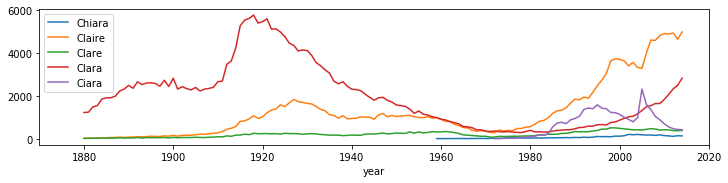

In [22]:
pp.figure(figsize=(12,2.5))

names = ['Chiara','Claire','Clare','Clara','Ciara']

#your code is here 5 Points

for name in names:
    plotname('F',name)
    
pp.legend(names)

With a little more work, we can visualize this plot as a cumulative plot, also known as a stacked line chart. We wish to plot the frequency of each variant on top of the other ones, so that the overall height of the graph will track the total number of variants. For this in matplotlib, we can use the stackplot command. First, however, we will have to slightly change the shape of the table. First of all, we select down in to subtable that contains only the variants.

In [23]:
#we need females and we need the variants of Claire's
# 10 Points
names = ['Chiara','Claire','Clare','Clara','Ciara']
yn1 = allyears_indexed.loc['F'].loc[names]
yn1

number
name   year        
Chiara 1959       9
       1960       5
       1962       8
       1963       8
       1964      12
...             ...
Clare  2010     420
       2011     414
       2012     379
       2013     376
       2014     383

[502 rows x 1 columns]

In [24]:
# promote the names from index value to column names
yn1 = yn1.unstack(level='name') 
yn1.head()
# 10 Points

number                           
name Chiara Ciara Claire   Clara Clare
year                                  
1880    NaN   NaN   21.0  1226.0  15.0
1881    NaN   NaN   23.0  1242.0  20.0
1882    NaN   NaN   30.0  1490.0  21.0
1883    NaN   NaN   38.0  1548.0  22.0
1884    NaN   NaN   33.0  1852.0  38.0

In [65]:
#fill the missing values with O
yn1=yn1.fillna(0)
yn1.head()
# 5 Points

number                           
name Chiara Ciara Claire   Clara Clare
year                                  
1880    0.0   0.0   21.0  1226.0  15.0
1881    0.0   0.0   23.0  1242.0  20.0
1882    0.0   0.0   30.0  1490.0  21.0
1883    0.0   0.0   38.0  1548.0  22.0
1884    0.0   0.0   33.0  1852.0  38.0

In [66]:
variants = allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0)

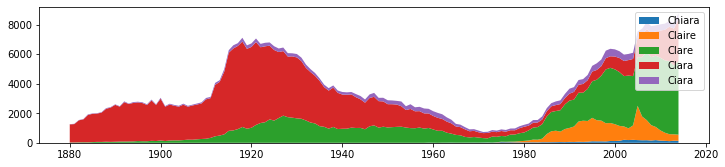

In [67]:
pp.figure(figsize=(12,2.5))

pp.stackplot(variants.index,variants.values.T,labels=names)
pp.legend(names)

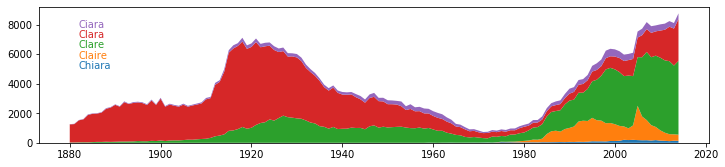

In [68]:
pp.figure(figsize=(12,2.5))

palette = seaborn.color_palette()
pp.stackplot(variants.index,variants.values.T,colors=palette)

for i,name in enumerate(names):
    pp.text(1882,5000+700*i,name,color=palette[i])

Next we'd like to extract the ten most popular male names in any given year.

In [26]:
# your code will print out the dataframe below male names in 2008 with values
df = allyears[(allyears.sex == 'M') & (allyears.year == 2008)].set_index(['sex','name','year']\
                                                ).sort_values(by=['number'], ascending=False)
df.head()
# 10 Points

number
sex name    year        
M   Jacob   2008   22568
    Michael 2008   20590
    Ethan   2008   20196
    Joshua  2008   19186
    Daniel  2008   18985

In [27]:
#pop2008 = your code above
pop2008 = df
# 5 points

In [28]:
pop2008.reset_index().drop(['sex','year','number'],axis=1).head()

,name
0,Jacob
1,Michael
2,Ethan
3,Joshua
4,Daniel


In [34]:
#write a function to find top ten male names in a given year
def topten(sex,year):
    df = allyears[(allyears.sex == sex) & (allyears.year == year)].set_index(['sex','name','year']\
         ).sort_values(by=['number'], ascending=False)
    df=df.reset_index().drop(['sex','year','number'],axis=1)
    df.index = range(1,len(df)+1)
    return(df.head(10))
# 15 Points

In [35]:
topten('M',2009)

,name
1,Jacob
2,Ethan
3,Michael
4,Alexander
5,William
6,Joshua
7,Daniel
8,Jayden
9,Noah
10,Christopher


In [36]:
n=2010
str(n)

'2010'

In [37]:
#Write a function to print top ten male and female names for a given range of years 
def toptens(sex,year1,year2):
    df = pd.DataFrame()
    for n in range(year1,year2+1):
        df1 = allyears[(allyears.sex == sex) & (allyears.year == n)].set_index(['sex','name','year']\
         ).sort_values(by=['number'], ascending=False)
        df1=df1.reset_index().drop(['sex','year','number'],axis=1)
        df1.index = range(1,len(df1)+1)
        df[str(n)] = df1['name']  
    return(df.head(10))
# 15 Points

In [38]:
toptens('M',2000,2010)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
1,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob
2,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Ethan,Ethan
3,Matthew,Matthew,Joshua,Joshua,Joshua,Joshua,Joshua,Ethan,Ethan,Michael,Michael
4,Joshua,Joshua,Matthew,Matthew,Matthew,Matthew,Ethan,Joshua,Joshua,Alexander,Jayden
5,Christopher,Christopher,Ethan,Andrew,Ethan,Ethan,Matthew,Daniel,Daniel,William,William
6,Nicholas,Nicholas,Andrew,Ethan,Andrew,Andrew,Daniel,Christopher,Alexander,Joshua,Alexander
7,Andrew,Andrew,Joseph,Joseph,Daniel,Daniel,Andrew,Anthony,William,Daniel,Noah
8,Joseph,Joseph,Christopher,Daniel,William,Anthony,Christopher,William,Anthony,Jayden,Daniel
9,Daniel,Daniel,Nicholas,Christopher,Joseph,Joseph,Anthony,Matthew,Christopher,Noah,Aiden
10,Tyler,William,Daniel,Anthony,Christopher,Christopher,William,Andrew,Matthew,Christopher,Anthony


In [39]:
toptens('F',1985,1995)

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
1,Jessica,Jessica,Jessica,Jessica,Jessica,Jessica,Ashley,Ashley,Jessica,Jessica,Jessica
2,Ashley,Ashley,Ashley,Ashley,Ashley,Ashley,Jessica,Jessica,Ashley,Ashley,Ashley
3,Jennifer,Amanda,Amanda,Amanda,Brittany,Brittany,Brittany,Amanda,Sarah,Emily,Emily
4,Amanda,Jennifer,Jennifer,Sarah,Amanda,Amanda,Amanda,Brittany,Samantha,Samantha,Samantha
5,Sarah,Sarah,Sarah,Jennifer,Sarah,Samantha,Samantha,Sarah,Emily,Sarah,Sarah
6,Stephanie,Stephanie,Stephanie,Brittany,Samantha,Sarah,Sarah,Samantha,Brittany,Taylor,Taylor
7,Nicole,Nicole,Brittany,Stephanie,Jennifer,Stephanie,Stephanie,Emily,Taylor,Brittany,Hannah
8,Heather,Brittany,Nicole,Samantha,Stephanie,Jennifer,Jennifer,Stephanie,Amanda,Amanda,Brittany
9,Elizabeth,Heather,Heather,Nicole,Lauren,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Amanda
10,Megan,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Lauren,Emily,Megan,Stephanie,Megan,Elizabeth


In [40]:
toptens('F',1985,1995).stack().head()

1  1985    Jessica
   1986    Jessica
   1987    Jessica
   1988    Jessica
   1989    Jessica
dtype: object

In [41]:
toptens('F',1985,1995).stack().value_counts()

Sarah        11
Jessica      11
Amanda       11
Ashley       11
Elizabeth    11
Brittany     10
Stephanie     9
Samantha      8
Jennifer      7
Emily         5
Nicole        4
Megan         3
Taylor        3
Heather       3
Lauren        2
Hannah        1
dtype: int64

In [42]:
popular = toptens('F',1985,1995).stack().value_counts().index[:6]
popular

Index(['Sarah', 'Jessica', 'Amanda', 'Ashley', 'Elizabeth', 'Brittany'], dtype='object')

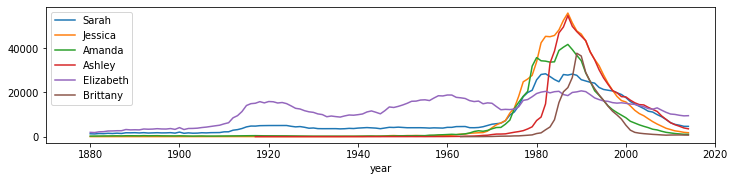

In [43]:
pp.figure(figsize=(12,2.5))

for name in popular:
    plotname('F',name)
    
pp.legend(popular)

We see that most of the names that were popular between 1985 and 1995 were relatively short lived. Only Elizabeth can be considered a classic.

### Exercise
Our task is to identify name fads. That is, popular names that appear suddenly and then fade away quickly.

Let us look at this plot for the popularity of the top six girl names between 1985 and 1995. Most of these names were only popular for a relatively short period. This prompts the question of how we can identify a name fad. A fad will have a certain spikiness to the plot, more like Britney here than Elizabeth. What we need to do is to compute a single number for each name that will tell us how spiky the plot will be.

However the number should be insensitive to the total number of appearances for a given name. After all, a small, not very popular fad is still a fad. It turns out that the trick to computing the spikiness will be to sum the squares of the frequencies of the names. It is a mathematical fact that if you multiply a function by itself, this increases it's contrast, if you wish, it's spikiness. Let's start by computing the total number of babies with a given name over all years. For this, we will use the groupby function, grouping by sex and name, and then sum all the values in each group.

In [44]:
allyears.groupby(['sex','name']).sum().head()

number   year
sex name                    
F   Aabha          21   6037
    Aabriella      10   4022
    Aaden           5   2009
    Aadhira        29   6039
    Aadhya        639  16084

In [45]:
allyears.groupby(['sex','name'])['number'].sum().head()

sex  name     
F    Aabha         21
     Aabriella     10
     Aaden          5
     Aadhira       29
     Aadhya       639
Name: number, dtype: int64

In [46]:
totals = allyears.groupby(['sex','name'])['number'].sum()

The aggregation function sum is not quite what we need. We need to sum the squares. Pandas doesn't have a function for that, but we can define it ourselves, so let's do that. Define sum S Q of X to return the sum of X squared. Let's compute the spikiness by repeating the groupby operation, selecting number, applying sum square, using the pandas function, ag, for aggregation.

Last, we want to divide by the totals. Doing that we put very popular and less popular names on uneven footing. We call this spikiness. Let's have a look. Indeed, the spikiness is a number between zero and one which happens when a name appears only in a single year. I will select only the names that appear relatively frequently, by requesting the totals be greater than 5000.

In [47]:
def sumsq(x):
    return sum(x**2)

In [48]:
spikyness = allyears.groupby(['sex','name'])['number'].agg(sumsq) / totals**2

In [49]:
spikyness.head()

sex  name     
F    Aabha        0.351474
     Aabriella    0.500000
     Aaden        1.000000
     Aadhira      0.362663
     Aadhya       0.262673
Name: number, dtype: float64

In [50]:
spiky_common = spikyness[totals > 5000].copy()
spiky_common = spiky_common.sort_values(ascending=False)
spiky_common.head(10)

sex  name     
M    Iker         0.199368
     Shaquille    0.195689
     Jase         0.182165
F    Adalynn      0.177107
     Harper       0.164827
M    Brantley     0.160532
F    Arya         0.159564
M    Bentley      0.159259
F    Miley        0.145886
     Paisley      0.144966
Name: number, dtype: float64

In [51]:
spiky_common.tail(5)

sex  name  
F    Rosa      0.008512
     Mollie    0.008437
M    Ike       0.008310
F    Delia     0.008263
     Louisa    0.007931
Name: number, dtype: float64

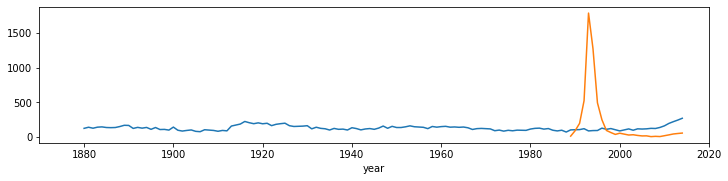

In [52]:
pp.figure(figsize=(12,2.5))

plotname('F','Louisa')
plotname('M','Shaquille')

In [53]:
fads = spiky_common.head(10).index.values

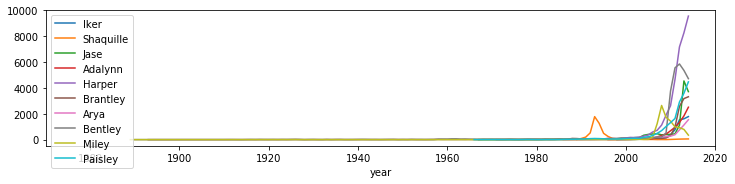

In [54]:
pp.figure(figsize=(12,2.5))

for sex,name in fads:
    plotname(sex,name)

pp.legend([name for sex,name in fads],loc='upper left')

The problem here is that most of these names are popular now, so we don't know whether they are fads just yet. They may have staying power. What we can do is to add another cut to the data that excludes names popular in the last ten years. For that, we'll need to compute totals over the last thirteen years.

In [30]:
#calculate totals_recent which is after 2005 grouped by sex and name and agg function sum
totals_recent = allyears[allyears['year'] >= 2005].groupby(['sex','name'])['number'].sum()
# 15 Points
totals_recent.head()

sex  name     
F    Aabha         21
     Aabriella     10
     Aaden          5
     Aadhira       29
     Aadhya       639
Name: number, dtype: int64

In [56]:
spiky_common = spikyness[(totals > 5000) & (totals_recent < 1000)].copy()
spiky_common= spiky_common.sort_values(ascending=False)
spiky_common.head(10)

sex  name     
M    Shaquille    0.195689
F    Katina       0.120872
     Krystle      0.100106
M    Devante      0.099617
F    Khadijah     0.091410
     Shanice      0.089675
     Iesha        0.088810
     Shaniqua     0.087601
     Sheena       0.080751
     Marquita     0.080338
Name: number, dtype: float64

In [57]:
fads = spiky_common.head(10).index.values

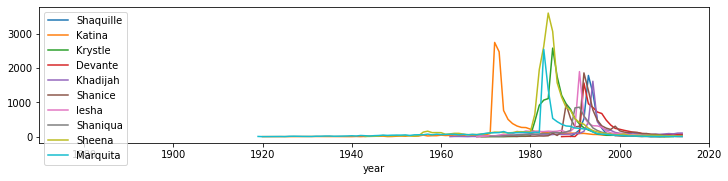

In [58]:
pp.figure(figsize=(12,2.5))

for sex,name in fads:
    plotname(sex,name)

pp.legend([name for sex,name in fads],loc='upper left')

### Final Question (70 Points)
For every name, compute the total number of times that the name was used for boys, and the total number of times that it was used for girls. Then, identify unisex names where the ratio between the boys total and the girls total is less than four either way. Last, plot the popularity of the top 10 unisex names. 

In [70]:
table = pd.DataFrame()
# total number of each name
table['total_number'] = allyears.groupby(['name'])['number'].sum()
#total number of each number by gender
table['total_num_M'] = allyears[allyears['sex'] == 'M'].groupby(['name'])['number'].sum()
table['total_num_F'] = allyears[allyears['sex'] == 'F'].groupby(['name'])['number'].sum()
# fill na with 0
table=table.fillna(0)
table.head()

,total_number,total_num_M,total_num_F
name,,,
Aaban,72,72.0,0.0
Aabha,21,0.0,21.0
Aabid,5,5.0,0.0
Aabriella,10,0.0,10.0
Aadam,196,196.0,0.0


In [71]:
for n in table.index:
    if (table.loc[n,'total_num_F'] != 0) & (table.loc[n,'total_num_M'] != 0):
        ratio = table.loc[n,'total_num_F']/table.loc[n,'total_num_M']
        table.loc[n,'ratio']= ratio
        if ((ratio < 4) & (ratio > 0.25)):
            table.loc[n,'Is_uni']=1
table=table.fillna(0)

In [72]:
table[table['Is_uni'] == 1]

,total_number,total_num_M,total_num_F,ratio,Is_uni
name,,,,,
Aalijah,262,155.0,107.0,0.690323,1.0
Aamari,155,88.0,67.0,0.761364,1.0
Aaren,999,717.0,282.0,0.393305,1.0
Aareon,43,33.0,10.0,0.303030,1.0
Aarian,116,76.0,40.0,0.526316,1.0
...,...,...,...,...,...
Zyaire,2005,1573.0,432.0,0.274634,1.0
Zyan,930,679.0,251.0,0.369661,1.0
Zyian,84,35.0,49.0,1.400000,1.0


In [93]:
# Top ten Unisex name all time

table10 = table[table['Is_uni'] == 1].sort_values(by=['total_number'], ascending=False).head(10)
table10

,total_number,total_num_M,total_num_F,ratio,Is_uni
name,,,,,
Willie,593888,447759.0,146129.0,0.326356,1.0
Jordan,479434,352524.0,126910.0,0.360004,1.0
Taylor,416096,107966.0,308130.0,2.853954,1.0
Leslie,376587,112533.0,264054.0,2.346458,1.0
Jamie,350262,84424.0,265838.0,3.148844,1.0
Angel,301425,209691.0,91734.0,0.437472,1.0
Lee,291691,229654.0,62037.0,0.270132,1.0
Jessie,274931,109317.0,165614.0,1.514989,1.0
Marion,259549,71753.0,187796.0,2.617256,1.0


<BarContainer object of 10 artists>

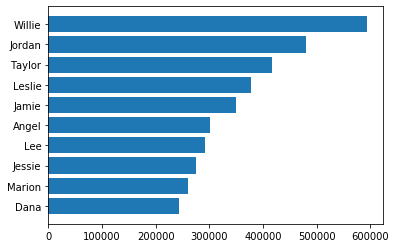

In [104]:

#table10['total_number'].plot(kind='hist')
table10= table10.sort_values(by=['total_number'],ascending=True)
plt.barh(table10.index, table10['total_number'])